# CMSC 320
## Varun Ayyappan
Note: I could not get ggplot to work, so I used seaborn instead for those plots.

# Part 1

In [28]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf


data = pd.read_csv("08_gap-every-five-years.tsv", sep='\t')
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [29]:
table_time_lifeexp = data[['year', 'lifeExp']].sort_values(by=['year'], ascending=True).reset_index(drop=True)
x_data = table_time_lifeexp['year'].values
y_data = table_time_lifeexp ['lifeExp'].values
table_time_lifeexp

,year,lifeExp
0,1952,28.801
1,1952,67.410
2,1952,37.003
3,1952,43.160
4,1952,30.000
...,...,...
1699,2007,56.867
1700,2007,46.859
1701,2007,80.196
1702,2007,65.483


## Exercise 1

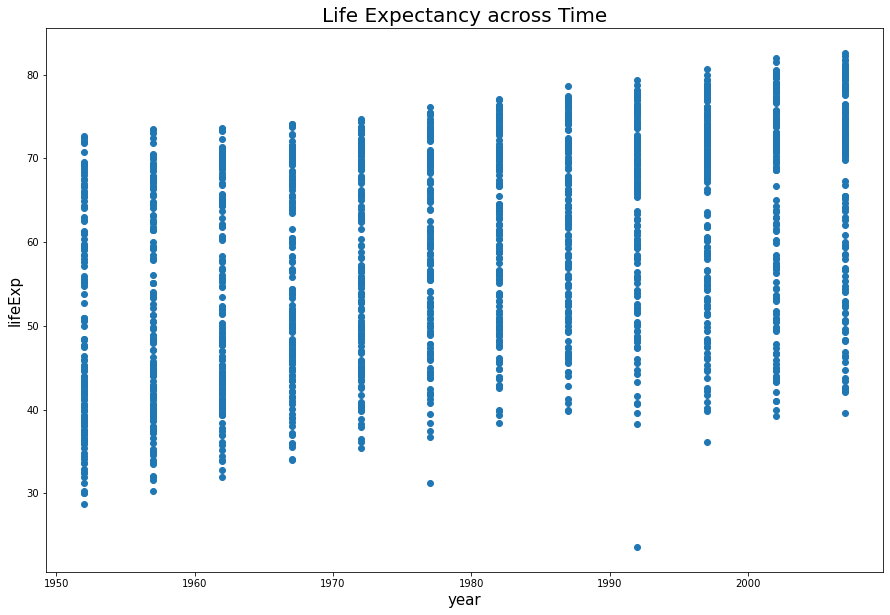

In [30]:
plt.figure(figsize=(15,10))
plt.plot(x_data, y_data,'o')
plt.xlabel("year", fontsize=15)
plt.ylabel("lifeExp", fontsize=15)
plt.title("Life Expectancy across Time", fontsize=20)

plt.show()


## Question 1

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Life Expectancy (Years)'),
 Text(0.5, 1.0, 'Life Expectancy Over Time')]

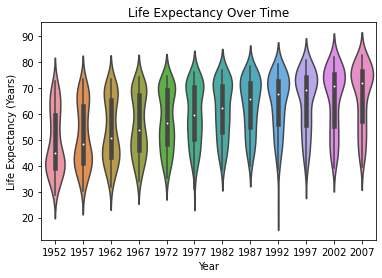

In [31]:
# x_vals = data['year'].tolist()
# y_vals = data['lifeExp'].tolist()
plot = sb.violinplot(x=x_vals, y=y_vals)

plot.set(xlabel ="Year", ylabel = "Life Expectancy (Years)", title ='Life Expectancy Over Time')

The general trend for life expectancy across time is linear and increasing. We can also observe the distrubtions from 1952 to around 1972 are bottom heavy, showing that more countries had a lower life expectancy. As the years progress, the violins become wider at the top, suggesting that more countries are having higher life expectancy.

## Question 2
The distribution of life expectancy by year across countries has trended from bottom to top heavy, making the distribution bimodal. The distribution for the years 1977 and 1992 are skewed towards the bottom as observed with the tails in the violin plot.

## Question 3
I would reject the null hypothesis of no relationship. We can observe a positive and linear relationship between year and life expectancy in both of the plots. With this I can conclude that the linear regression model would likely have a p value less than 0.05, which would lead me to reject the null hypothesis that there is not a relationship between year and life expectancy.

## Question 4
The violin plot of the residuals from the linear model would be linear as well. The data would not be unimodal and centered around zero.

## Question 5
The data would be unimodal and centered around zero.

## Exercise 2

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           7.55e-80
Time:                        04:00:39   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0

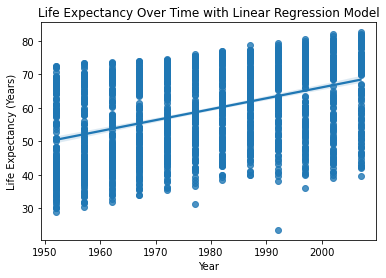

In [32]:
lin_plot = sb.regplot(x=x_vals, y=y_vals)
lin_plot.set(xlabel ="Year", ylabel = "Life Expectancy (Years)", title ='Life Expectancy Over Time with Linear Regression Model')

results = smf.ols(formula = "lifeExp ~ year", data = data).fit()
print(results.summary())

## Question 6
Life expectancy increases by 0.3259 years per year on average acording the the slope of the best-fit line.

## Question 7
I reject the null hypothesis because the p-value is 0 which is less than 0.05.

## Exercise 3

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Life Expectancy Residuals'),
 Text(0.5, 1.0, 'Life Expectancy Residuals Over Time')]

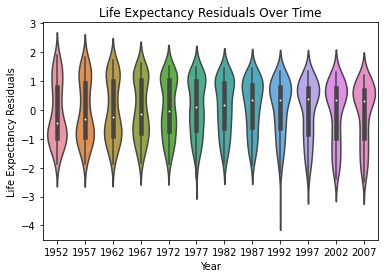

In [33]:
influence = results.get_influence()
residuals = influence.resid_studentized_internal

plot_residual = sb.violinplot(x =x_vals, y = residuals)
plot_residual.set(xlabel ="Year", ylabel = "Life Expectancy Residuals", title ='Life Expectancy Residuals Over Time')

## Question 8
This plot does match my expectations as it is linear and descends over time. The shapes of each violin is also similar to the shapes of the violins in the previous violin plot.

## Exercise 4

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Life Expectancy Residuals'),
 Text(0.5, 1.0, 'Life Expectancy Residuals By Continent')]

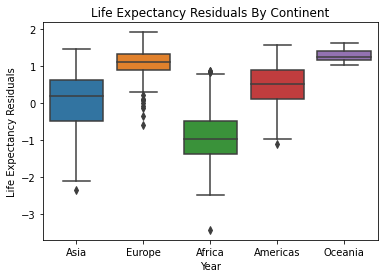

In [34]:
continents = data['continent']
box = sb.boxplot(x=continents,y=residuals)
box.set(xlabel ="Year", ylabel = "Life Expectancy Residuals", title ='Life Expectancy Residuals By Continent')

## Question 9
Yes there is a dependence between model residual and continent and we can observe this in the box plot. The boxes for each continent are visibly different. This suggets that the regression analysis is also dependent on the continent variable.

## Exercise 5

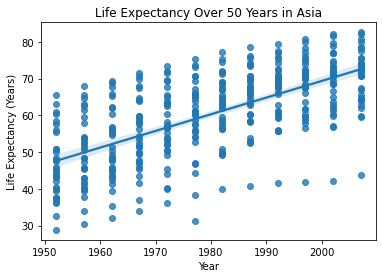

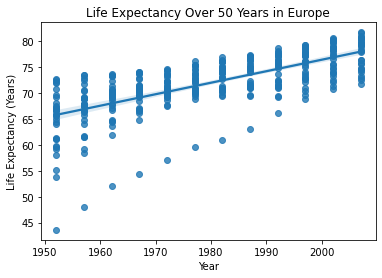

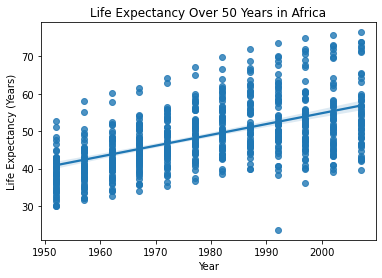

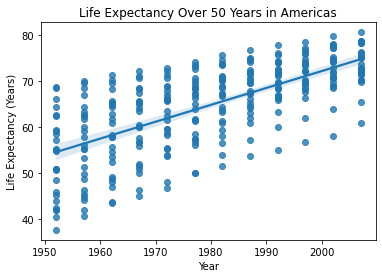

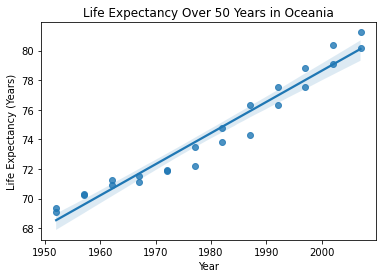

In [35]:
continents_list = continents.drop_duplicates()

for continent in continents_list: 
    curr = data.drop(data[continent != data['continent']].index)
    plt.figure() # making a plot for each continent
    sb.regplot(x = curr['year'], y = curr['lifeExp'])
    plt.title("Life Expectancy Over 50 Years in " + continent)
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy (Years)")

## Question 10
Yes the regression model should include an interaction term for continent and year because we can observe that the coefficient of the regresion line changes with the continent that is being focused on. Including continent as a variable will make the regression model more accurate.

## Exercise 6

In [36]:
interaction = smf.ols(formula = 'lifeExp ~ year * continent', data = data).fit()
print(interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        04:00:40   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

## Question 11
All paramater except for Oceania have a p-value less than 0.05, so close to 0. Oceania has a p value of 0.287 without interaction and 0.360 with interaction.

## Question 12

In [37]:
print("Coefficients :")
print(interaction.params)

Coefficients :
Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64


From the coefficients, we can find the average life expectancy change. The increases are 0.078122 for the Americas and 0.163593 for Asia. the decreases are 0.067597 for Europe and 0.079257 for Oceania.

## Exercise 7

In [38]:
print("Linear Regression 2, F stat: ",results.fvalue)
print("Linear Regression 2, F stat(p_value): ", results.f_pvalue)
print("\n")
print("Linear Regression 6, F stat: ", interaction.fvalue)
print("Linear Regression 6, F stat(p_value): ", interaction.f_pvalue)

Linear Regression 2, F stat:  398.6047457117622
Linear Regression 2, F stat(p_value):  7.546794625598736e-80


Linear Regression 6, F stat:  424.2729023400693
Linear Regression 6, F stat(p_value):  0.0


## Question 13
The interaction model is significantly better than the year-only model because the interaction model has a higher R-squared and F-statistc value. This is in line with our previous observations and conclusions drawn from the plots.

## Exercise 8

Text(0.5, 1.0, 'Residuals of Life Expectancy Over 50 Years Using Interaction Model')

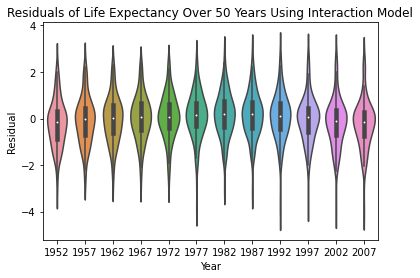

In [39]:
influence = interaction.get_influence()
residuals = influence.resid_studentized_internal
sb.violinplot(x=x_vals, y=residuals);
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Residuals of Life Expectancy Over 50 Years Using Interaction Model')

This plot matches the assumptions we can make based of the linear regression model because it is normal, unimodal and centering around zero.